In [1]:
import tensorflow as tf
import numpy as np

### AutoEncoder with MNIST

In [12]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_y.shape)

(60000, 28, 28) (60000,)


In [13]:
train_X= train_X/255
test_X = test_X/255

In [14]:
import matplotlib.pyplot as plt


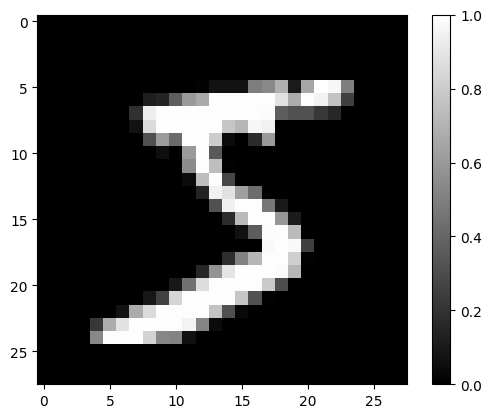

5


In [15]:
plt.imshow(train_X[0].reshape(28, 28), cmap = 'gray')
plt.colorbar()
plt.show()

print(train_y[0])

In [17]:
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

print(train_X.shape, test_X.shape)


(60000, 784) (10000, 784)


In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dense_7 (Dense)             (None, 64)                50240     
                                                                 
 dense_8 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(train_X, train_X, epochs=20, batch_size=256) # 입력과 타겟이 동일

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.8507
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.8507
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6750
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0573
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0423
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0384
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0335
Epoch 8/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0300
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0293
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0289
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0287
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0285
Epoch 13/20
235/235 [====

1/1 [==============================] - 0s 19ms/step


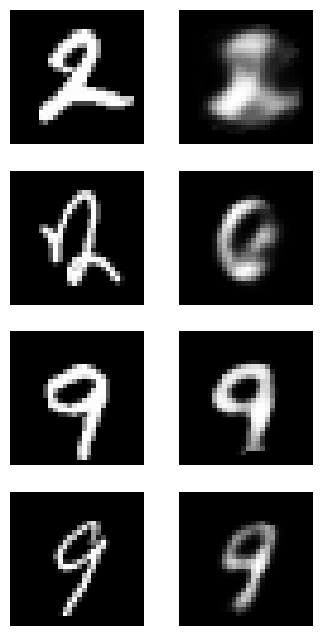

In [37]:
import random

plt.figure(figsize = (4,8))

for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_idx = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_idx].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_idx], axis = 0))
  plt.imshow(img.reshape(28 , 28), cmap='gray')
  plt.axis('off')

plt.show()


In [38]:
model.evaluate(test_X, test_X)


313/313 [==============================] - 1s 4ms/step - loss: 0.0250


0.025008076801896095

### CNN

In [42]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(7*7*64, activation = 'relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss = 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_11 (Dense)            (None, 64)                200768    
                                                                 
 dense_12 (Dense)            (None, 3136)              203840    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 32)      

In [43]:
model.fit(train_X, train_X, epochs = 20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 9s 6ms/step - loss: 0.0780
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0300
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0227
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0198
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0187
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0182
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0178
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0175
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0173
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0171
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0170
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0169
Epoch 13/20
235/235 [===

1/1 [==============================] - 0s 36ms/step


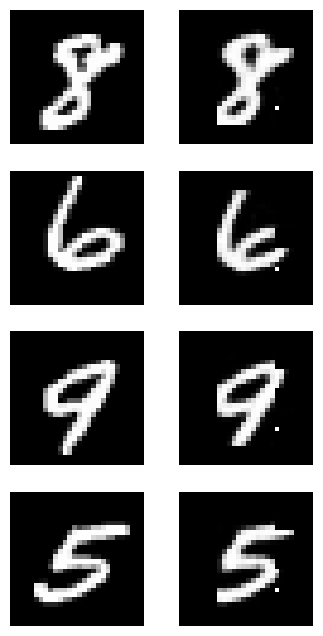

In [44]:
import random

plt.figure(figsize = (4,8))

for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_idx = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_idx].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_idx], axis = 0))
  plt.imshow(img.reshape(28 , 28), cmap='gray')
  plt.axis('off')

plt.show()


#### Activation function - ELU

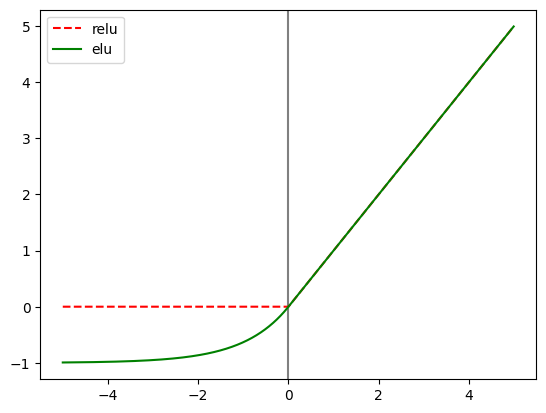

In [48]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z <0 else z for z in x]
elu = [1.0 * (np.exp(z)-1) if z < 0 else z for z in x]

plt.axvline(0, color = 'gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [50]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'elu'),
    tf.keras.layers.Dense(7*7*64, activation = 'elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss = 'mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_15 (Dense)            (None, 64)                200768    
                                                                 
 dense_16 (Dense)            (None, 3136)              203840    
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 14, 14, 32)      

In [52]:
model.fit(train_X, train_X, epochs = 10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0081
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0079
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0077
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0076
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0074
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0073
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0072
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0071
Epoch 10/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0069


1/1 [==============================] - 0s 20ms/step


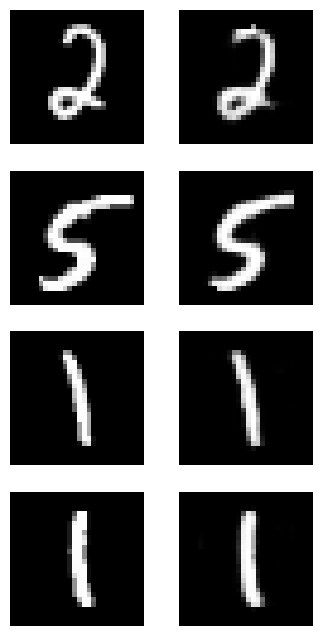

In [53]:
import random

plt.figure(figsize = (4,8))

for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_idx = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_idx].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_idx], axis = 0))
  plt.imshow(img.reshape(28 , 28), cmap='gray')
  plt.axis('off')

plt.show()

### Latent_Vector

In [54]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs = model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

1875/1875 [==============================] - 4s 2ms/step
(60000, 64)
[19.243433   -1.         34.30929    -1.         17.565643   18.309574
  1.5808065  -1.         29.521202    9.738793   -0.9999996  15.561413
 12.655551   16.273901   -1.         15.102857   -1.         10.751307
 -0.99999994 14.539401   19.53631    -0.99999994 -1.         31.22077
 24.787672    2.8425474  31.92695    -1.         -0.9999992  13.101514
 -1.         13.148969   -0.99999994 -0.99999976 -0.99999964  5.911452
 -0.9984088   3.0830107  -0.99999857 32.798557   -0.99999976 30.040194
 -0.9999499  -1.         15.158767    2.7359354  -1.          2.38393
 18.668074   -0.9999449  -0.99999845 15.935744   -0.9999976  19.445414
 -0.9999883  -0.9999809   8.520239   11.424801    5.173744   -1.
 -1.         12.825708   16.93995    -1.        ]


In [55]:
%%time
from sklearn.cluster import KMeans

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 15.3 µs


10개의 군집(cluster)으로 데이터를 클러스터링하는 KMeans 객체를 생성합니다.

n_init=10은 알고리즘을 10번 실행하여 무작위 초기화에서 가장 좋은 결과를 선택하도록 합니다.

In [57]:
Kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
Kmeans.fit(latent_vector)

KMeans(n_clusters=10, n_init=10, random_state=42)

labels_에는 각 데이터가 0부터 9사이의 어떤 클러스터에 속하는지에 대한 정보가 저장됩니다.

cluster_cetners_에는 각 클러스터의 중심 좌표가 저장되고, 잠재변수와 마찬가지로 64차원이기 때문에 이 좌표가 각각 무엇을 의미지하는지 직관적으로 알기 어렵습니다.

In [60]:
print(Kmeans.labels_)
print(Kmeans.cluster_centers_.shape)
print(Kmeans.cluster_centers_[0])

[4 2 6 ... 8 7 5]
(10, 64)
[13.3507     -0.99999994 12.755156   -0.99999994 19.815527   12.8845215
  2.8769965  -0.9999999  19.754719   26.573452   -0.9999993  18.88453
  7.5569024  21.810745   -0.99999994 25.482258   -0.9999999   5.1079216
 -0.99999964 13.301533   16.83107    -0.99999857 -0.99999994 31.941223
 19.54553     6.8958507  13.610795   -0.99999994 -0.9999935  22.695007
 -0.99999994 18.79152    -0.9999995  -0.9999994  -0.9999978  24.359478
 -0.98437107 14.256262   -0.9999991  11.592746   -0.9999994  13.421804
 -0.9964313  -0.9999985  12.144585    3.6482275  -0.99999994  2.2535498
 18.639652   -0.993491   -0.9999647  16.073473   -0.99994487 13.2682495
 -0.99999416 -0.99991715 18.417551   18.600996   20.111761   -0.9999999
 -0.9999998  26.299923   15.149674   -0.9999998 ]


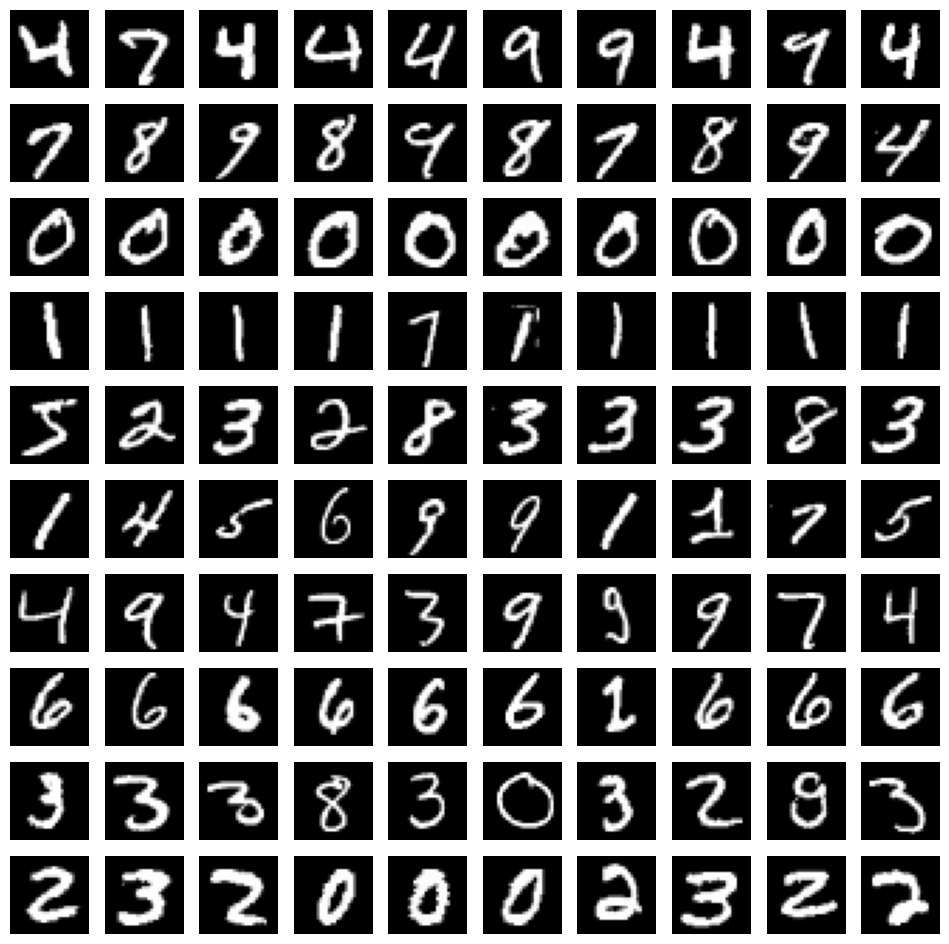

In [62]:
plt.figure(figsize=(12,12))

for i in range(10):
  images = train_X[Kmeans.labels_ == i]
  for c in range(10):
    plt.subplot(10, 10, i*10+c+1)
    plt.imshow(images[c].reshape(28, 28), cmap = 'gray')
    plt.axis('off')


plt.show()


#### t-SNE
- 고차원의 멕터를 저차원으로 옮겨 시각화에 도움을 주는 방법
- k-Means 가 각 클러스터를 계산하기 위한 단위로 중심과 각 데이터의 거리를 측정한다면
- t-SNE는 각 데이터의 유사도를 정의하고 원래 공간에서의 유사도와 저차원의 공간에서의 유사도가 비슷해지도록 학습시킴
- 여기서 유사도는 수학적 확률로 표현

In [64]:
%%time
from sklearn.manifold import TSNE

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 19.1 µs


- n_components는 저차원의 수를 의미합니다. 2차원 공간이기 때문에 2를 넣습니다.
- perplexity는 알고리즘 계산에서 고려할 최근접 이웃의 숫자이며, 보통 5-50사이의 숫자를 넣습니다

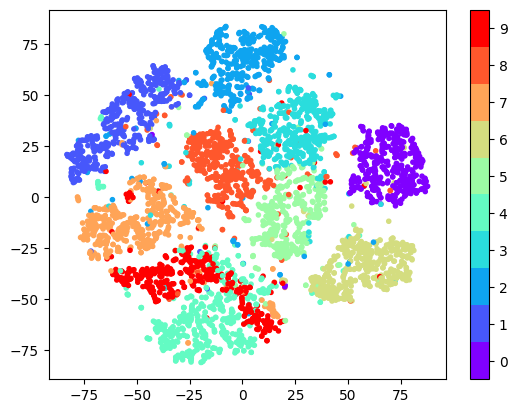

In [66]:
tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c=train_y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters=10
tick_locs = (np.arange(n_clusters)+ 0.5)*(n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

#### t-SNE 클러스터 위에 MNIST 이미지 표시

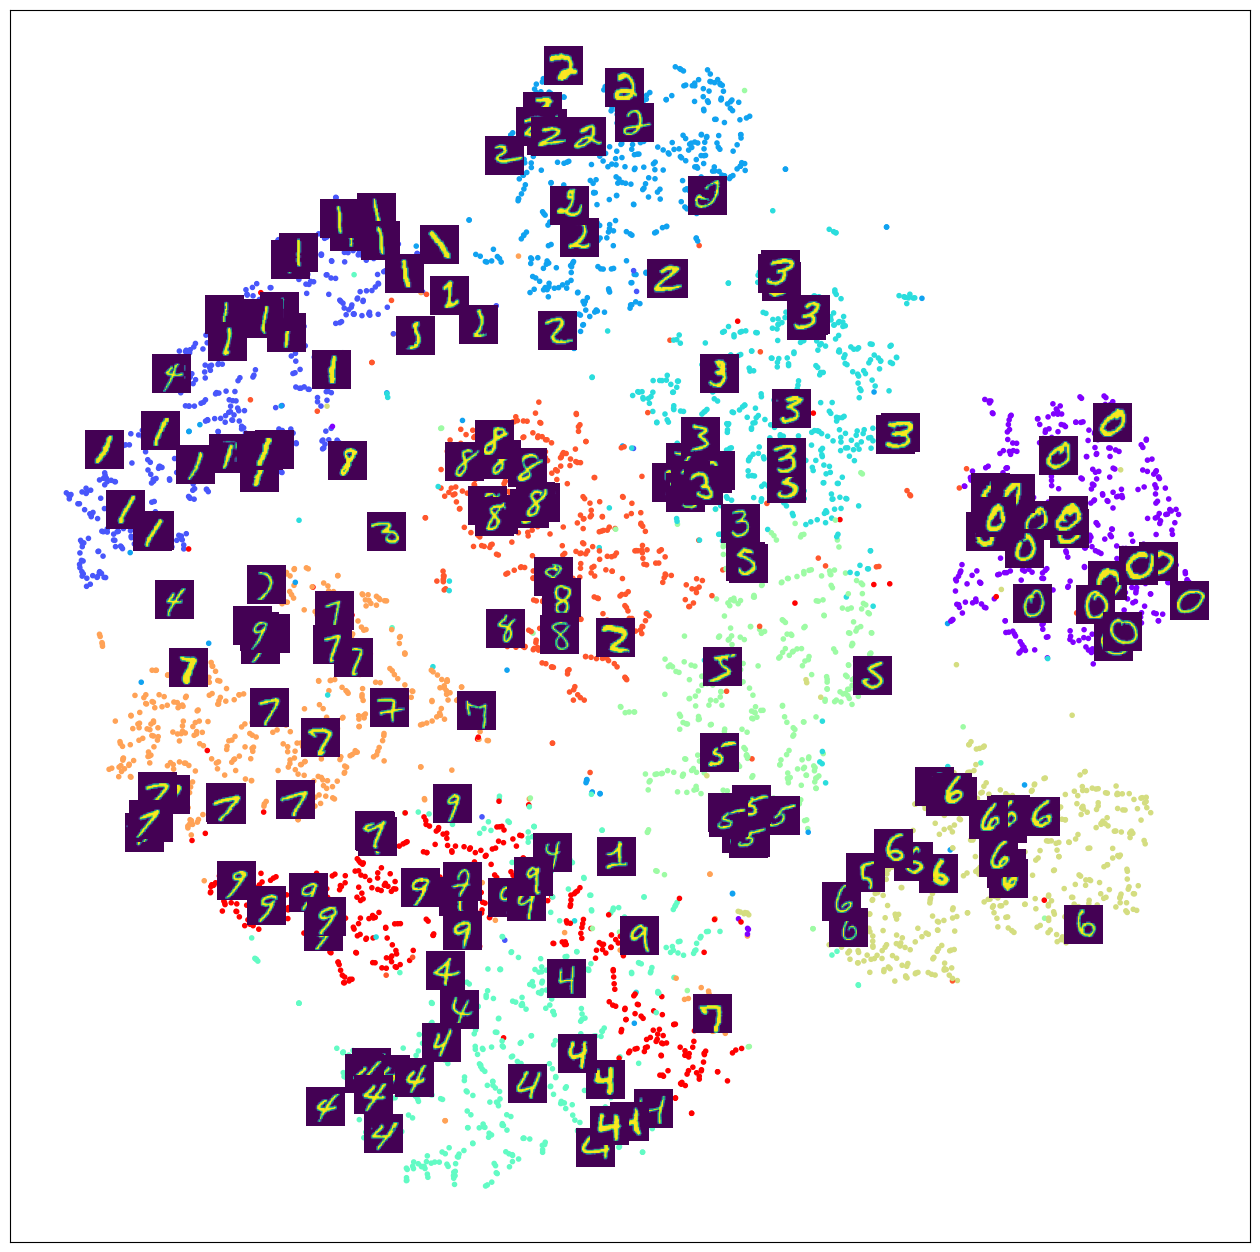

In [68]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16, 16))

tsne=TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector=tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:, 0], tsne_vector[:,1], marker='.', c=train_y[:5000], cmap='rainbow')
for i in range(200):
  imagebox = OffsetImage(train_X[i].reshape(28, 28))
  ab = AnnotationBbox(imagebox, (tsne_vector[i, 0], tsne_vector[i, 1]), frameon=False, pad=0.0)
  ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()